# Learn to apply Featurization and Model Tuning Project

### George Mathew

## Objective:
Modeling of strength of high performance concrete using Machine Learning

## Steps and tasks:
1. Deliverable - 1 (Exploratory data quality report reflecting the following)</br>

    a. Univariate analysis</br>
    
    Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers</br>
        
    b. Multivariate analysis</br>
    
    Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes</br>
        
    c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation</br>
    
2. Deliverable - 2 (Feature Engineering techniques)</br>

    a. Identify opportunities (if any) to create a composite feature, drop a feature etc.</br>
    
    b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help.</br>
    
    c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength.</br>
    
3. Deliverable - 3 (create the model )</br>

    a. Obtain feature importance for the individual features and present your findings</br>
    
4. Deliverable - 4 (Tuning the model)</br>

    a. Algorithms that you think will be suitable for this project.</br>
    
    b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit.</br>
    
    c. Model performance range at 95% confidence level.</br>

## Solution:

## Deliverable - 1 (Exploratory data quality report reflecting the following)

### a. Univariate analysis

#### Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA 
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

In [2]:
# Import the data

In [3]:
conData = pd.read_csv("concrete.csv")

In [4]:
# Look at the sample
conData.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
# Shape of the data

In [6]:
conData.shape

(1030, 9)

In [7]:
# Checking the presence of missing values

In [8]:
conData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
# 5-point summary

In [10]:
conData.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [11]:
# Check the skew of the columns
conData.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [12]:
# Checking the presence of Null values

In [13]:
conData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [14]:
conData.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#### Analysis
1) We are given a data set with 1030 rows and 9 variables including the target - 'strength'

2) All of the independent variables are numerical (age is int, while the others are float)

3) There are no null values

4) There are no missing values

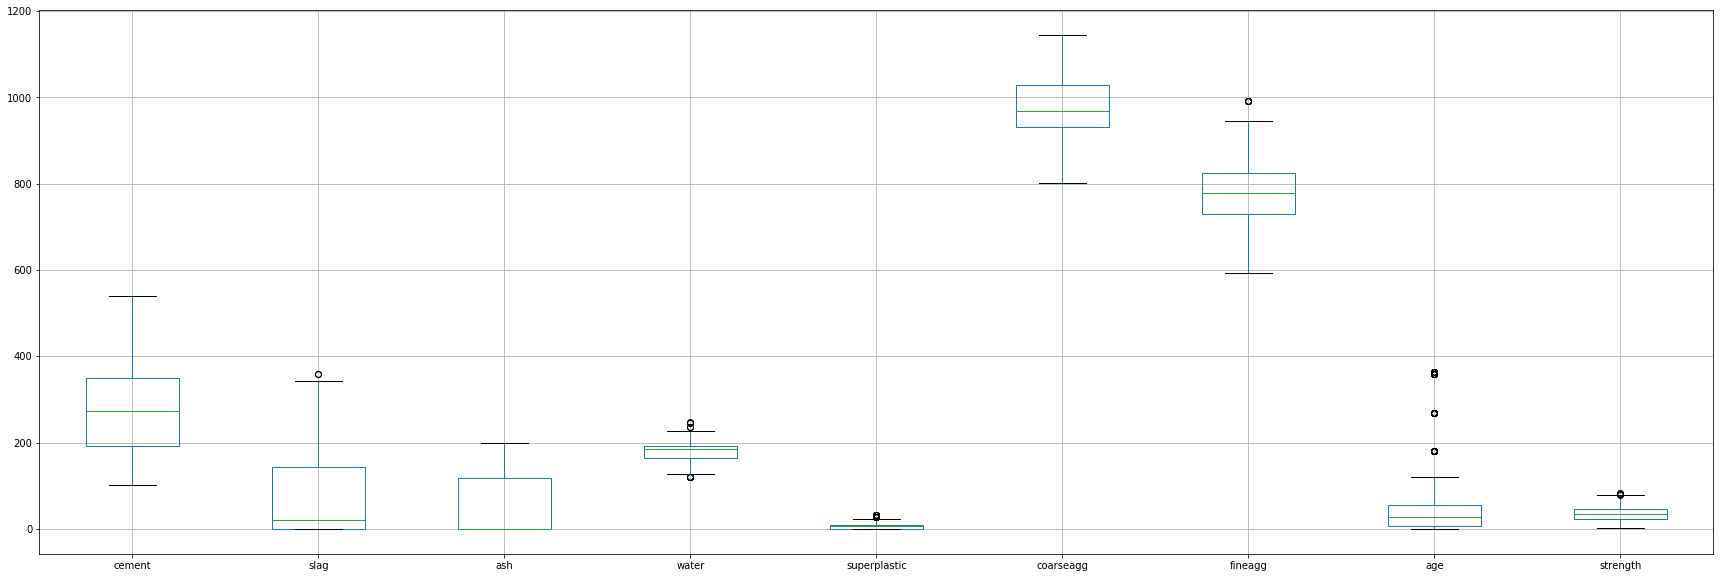

In [15]:
plt.subplots(figsize=(30,10))
conData.boxplot()

#### We see that the data has lots of outliers. How much, we will find out below.

In [16]:
def plotOutliers(df):
    for cols in df.columns:
        sns.boxplot(df[cols])
        plt.show()

        sns.distplot(df[cols])
        plt.axvline(df[cols].mean(),linestyle="dashed",label="mean",color="k")
        plt.show()

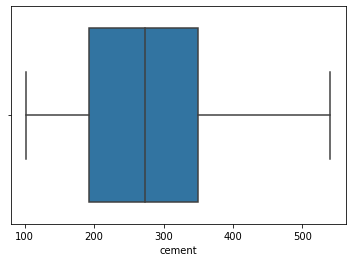

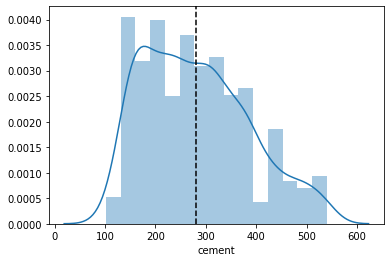

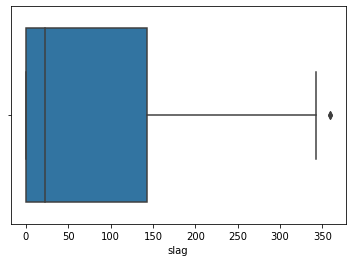

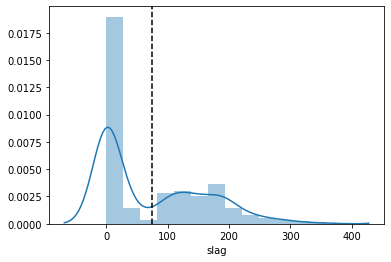

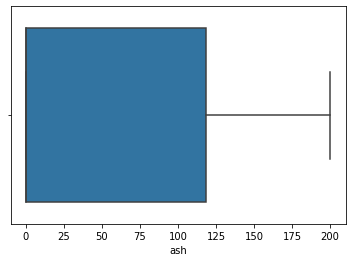

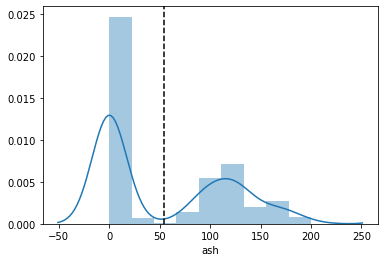

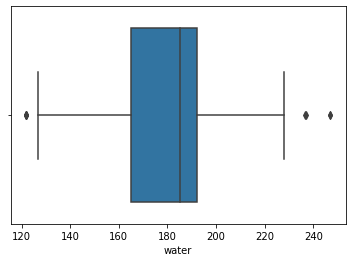

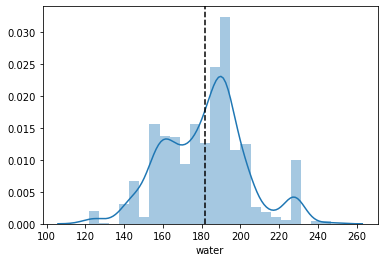

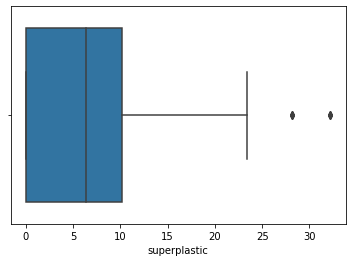

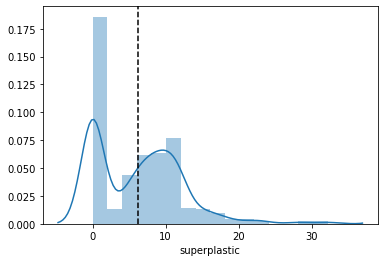

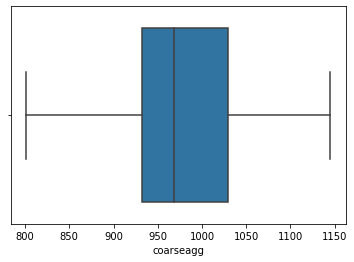

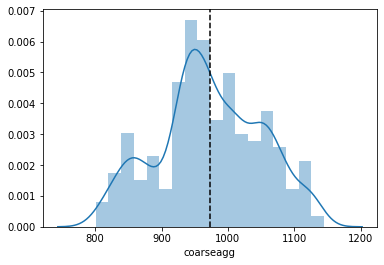

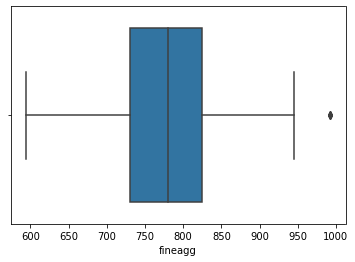

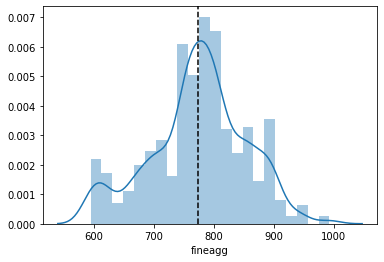

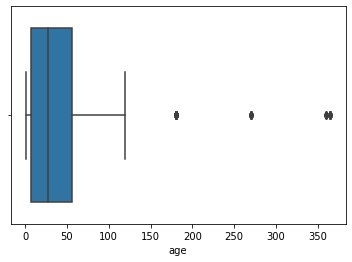

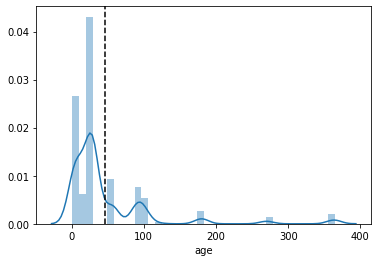

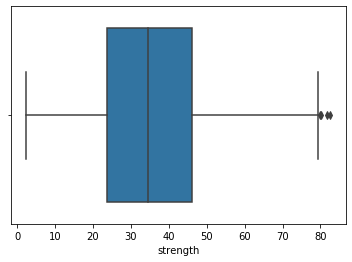

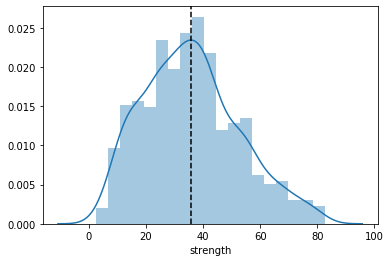

In [17]:
plotOutliers(conData)

#### Analysis :
1) Cement: Has a normal distribution and no outliers. but it has a slight right skew (.51).<br>

2) Slag: Is not normally distributed but has outliers. It has 2 peaks suggesting 2 gausssians and is right skewed (.8).<br>

3) Ash:  Is not normally distributed and has 2 peaks suggesting 2 gausssians and is slightly right skewed (.53).<br>

4) Water: Is normally distributed but has outliers on both ends. It has 3 peaks suggesting 3 guassians.<br>

5) Superplastic: Is not normally distributed and has 2 peaks suggesting 2 gausssians and is right skewed (.9).<br>

6) Coarseagg: Is normally distributed. It has 3 peaks suggesting 3 guassians.<br>

7) Fineagg: Is normally distributed. It has 2 peaks suggesting 2 guassians and a slight left skew (-.25).<br>

8) Age: Is not normally distributed and has outliers. It has around 5 peaks suggesting 5 gausssians and is highly right skewed (3.3).<br>

9) Strength: The Target variable: Has a normal distribution and has outliers. but it has a slight right skew (.41).<br>

### b. Multivariate analysis

#### Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

In [18]:
conData.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


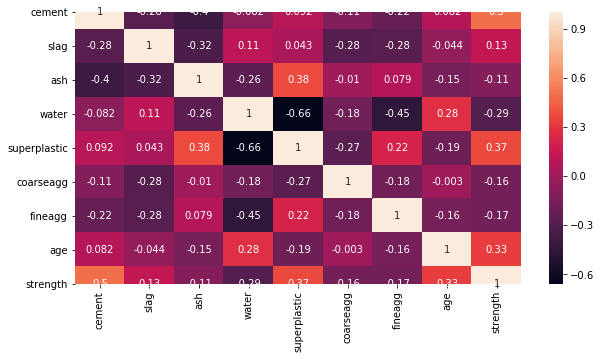

In [19]:
plt.subplots(figsize=(10,5))
sns.heatmap(conData.corr(), annot=True)

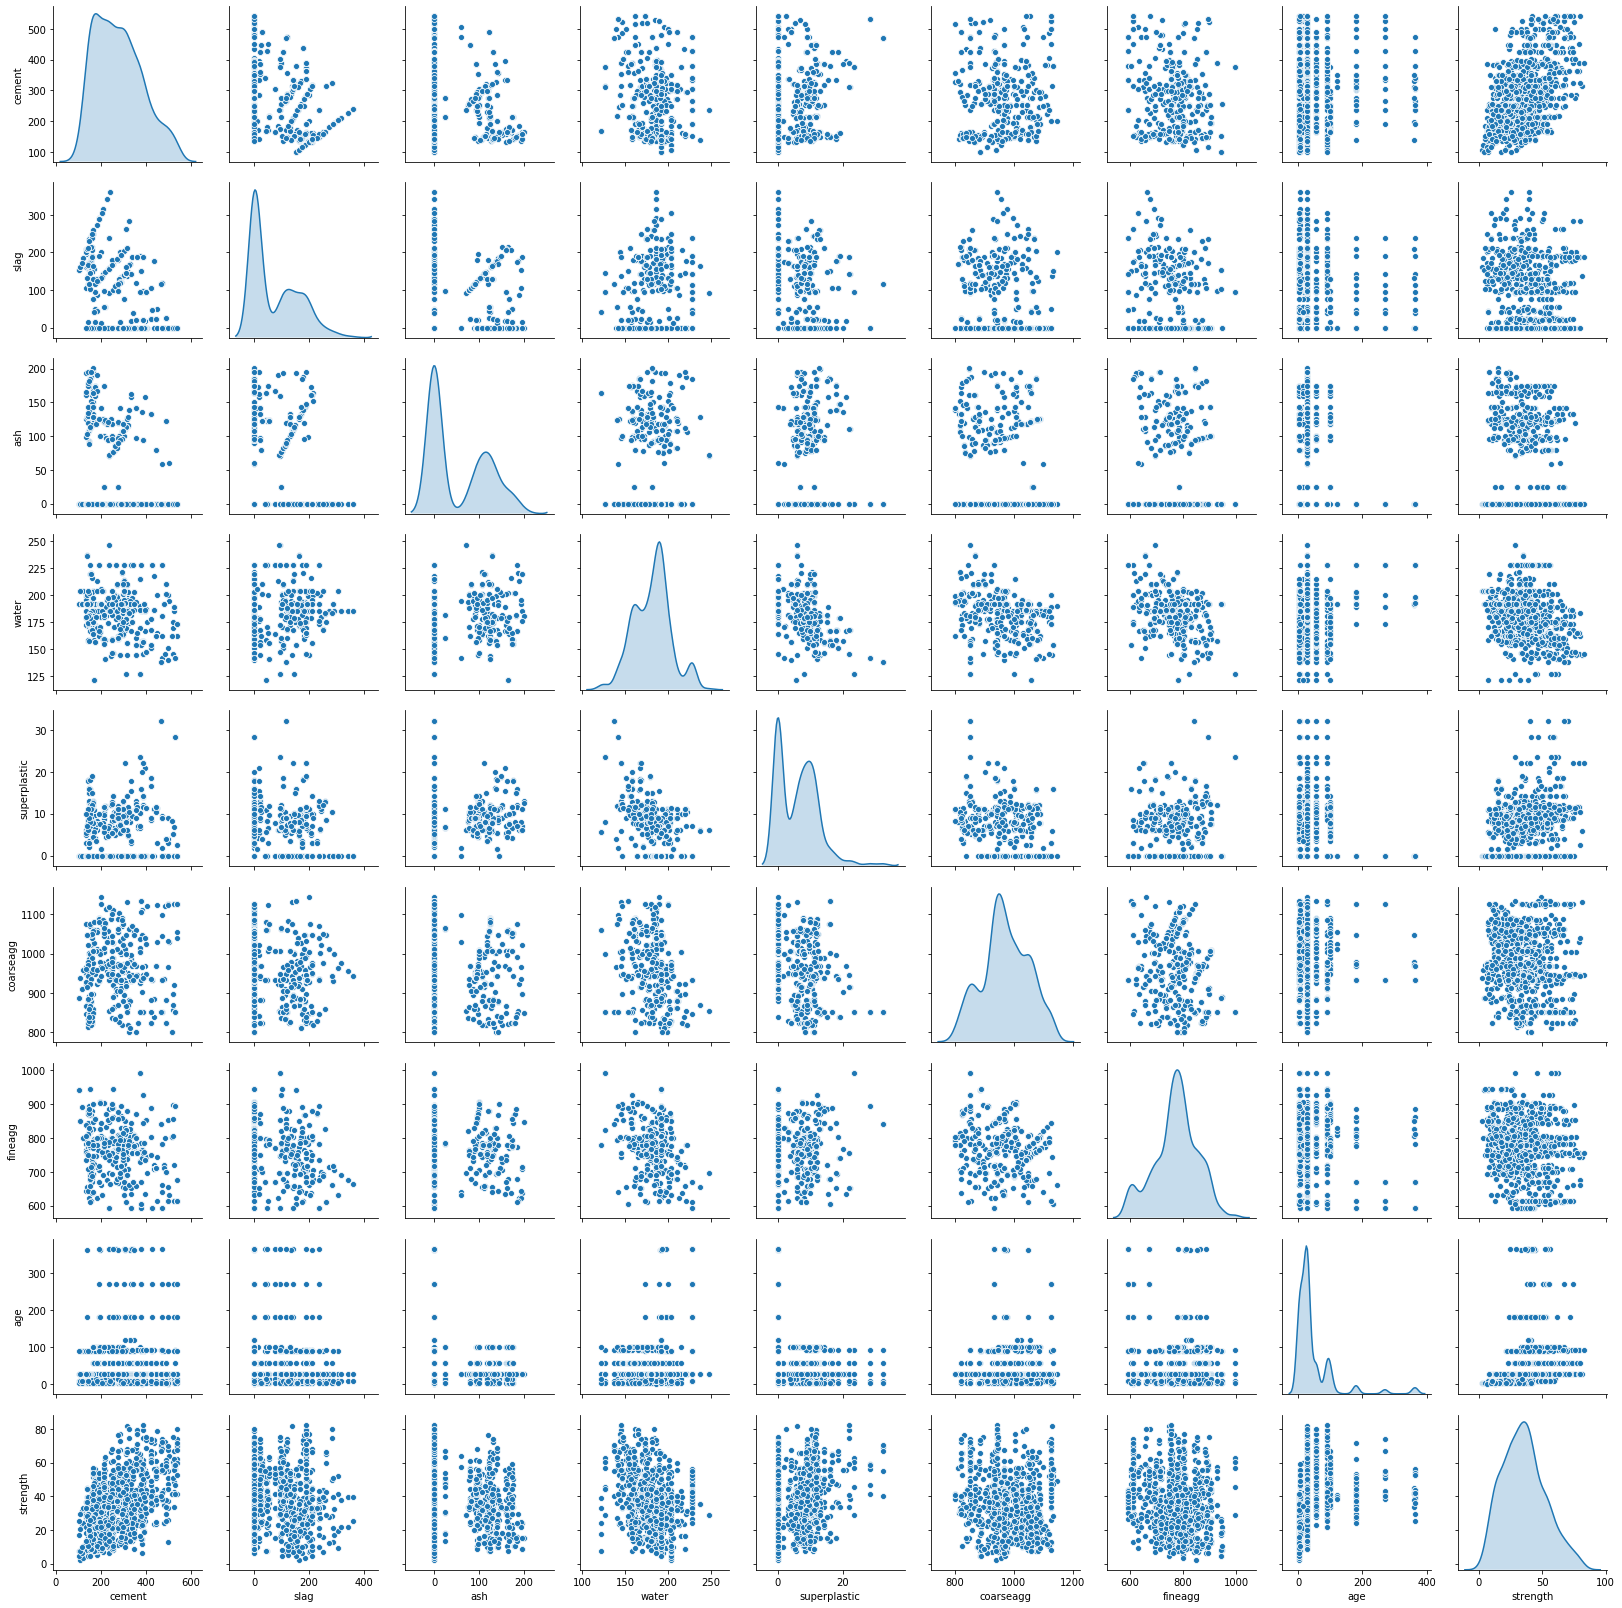

In [20]:
sns.pairplot(conData, diag_kind='kde')

#### Analysis
1) There are no significant correlations between the independent variables. hence we cannot drop any of the variables on that analysis<br>

2) None of the independent variables shows a good relation with the target variable<br>

## c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation

#### Analysis:
As mentioned previously, slag, water, superplastic and age contain outliers.

In [21]:
conData.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [22]:
# We can use the standard deviation to detact and eleminate outliers. 

In [23]:
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = group.median()        
    return group

conData.transform(replace)   

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28,55.06


In [24]:
conData.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,72.619126,84.585573,0.00,0.000,22.000,142.500,316.1
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.446990,21.158975,121.80,164.900,185.000,192.000,237.0
superplastic,1030.0,5.973592,5.477165,0.00,0.000,6.400,10.075,23.4
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,36.093204,36.185504,1.00,7.000,28.000,28.000,180.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


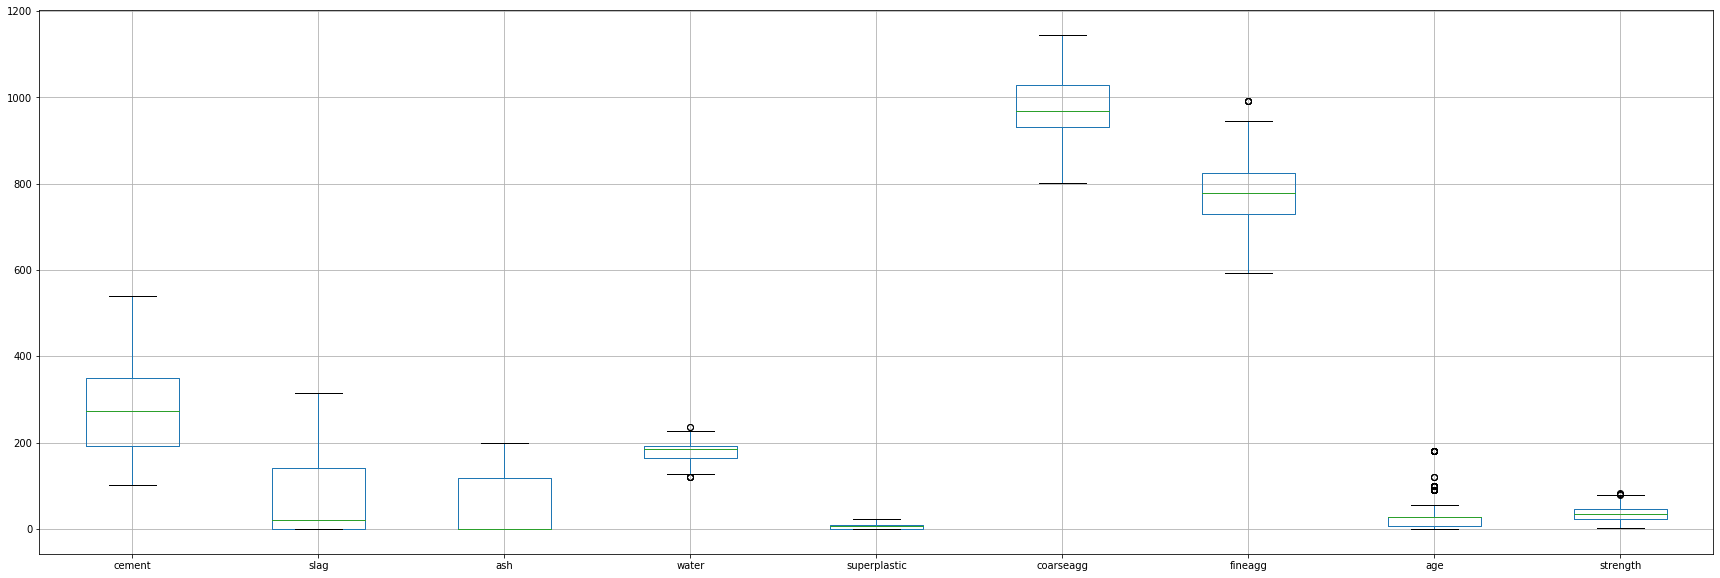

In [25]:
plt.subplots(figsize=(30,10))
conData.boxplot()

In [26]:
def zeroValues(df): #Function to identify zero values
    for cols in df.columns:
        zno=len(df[(df[cols]==0)])
        print (cols," : ",zno)

In [27]:
zeroValues(conData)

cement  :  0
slag  :  471
ash  :  566
water  :  0
superplastic  :  379
coarseagg  :  0
fineagg  :  0
age  :  0
strength  :  0


#### Analysis
1) After the imputation, we have got rid of the most obvious oultliers. Ofcourse, doing that intorduces other outliers because the data becomes more concentrated aroind the mean. But we have to live with that as trying to remove that will significantly affect the validity of the data set<br>

2) We find that there are lots of Zeros in the data set. Having Zeros is no harm unless the experts in the relative domain who are the recipients of the model/effort indicate they need to be treated. Our problem statement didn’t indicate that either (zeroes to be treated).

## Deliverable - 2 (Feature Engineering techniques)

## a. Identify opportunities (if any) to create a composite feature, drop a feature etc.

#### Observation
From the pairplot we see that there is a cloud of data point among the ash, water, coarseagg, fineagg. This shows a very weak relationship with the target variable. 

Let us test that. 

In [28]:
conData[conData.columns[1:]].corr()['strength'][:]

slag            0.141306
ash            -0.105755
water          -0.289857
superplastic    0.346260
coarseagg      -0.164935
fineagg        -0.167241
age             0.421631
strength        1.000000
Name: strength, dtype: float64

In [29]:
# As can be seen from the correlation between the independent variables and the target variable, the correlation between 
# ash, water, coarseagg, fineagg is negative. 

In [30]:
# To really understand this, let us do a lasso regularization on a simple leniear model to see if the independent   
# variables really have any effect on the target veriable.

In [31]:
conData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [32]:
X = conData.drop('strength',axis=1)
y = conData[['strength']]

In [33]:
# scale all the columns of the dataframe. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)
X_train.shape

(721, 8)

In [35]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.43949974  0.16186057  0.         -0.09116037  0.19371336 -0.
 -0.          0.33111152]


In [37]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6654796494834669
0.6542200050385425


In [38]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5967616228122014
0.5851640500258921


#### Analysis
We see from the lasso regularization that ash, coarseagg and fineagg have little effect on the modeland may be dropepd. But considering that there are only 8 independent variables to start with and none of them show significant correlation between them, we will keep these variables for now and not drop them. 

Also we see that the lasso regularization actually made the model worse. 

If, after model building, we find that the performance is not good, then we can maybe think of droping them.

#### Observation
To see if we have an opportunity to create any composite variables, let us try to create  some out of the following and see if they are able to bring in an extra dimention to the target variable:

slag - cement, ash - slag, coars/fine agg - ash, fine agg - corse agg

In [39]:
conDataComposite = conData.copy(deep=True)

In [40]:
conDataComposite['SlagPerCement'] = conDataComposite['slag'] / conDataComposite['cement']

In [41]:
conDataComposite['AshPerSlag'] = conDataComposite['ash'] / conDataComposite['slag']

In [42]:
conDataComposite['CoarseaggPerAsh'] = conDataComposite['coarseagg'] / conDataComposite['ash']

In [43]:
conDataComposite['FineaggPerAsh'] = conDataComposite['fineagg'] / conDataComposite['ash']

In [44]:
conDataComposite['FineaggPerCoarseagg'] = conDataComposite['fineagg'] / conDataComposite['coarseagg']

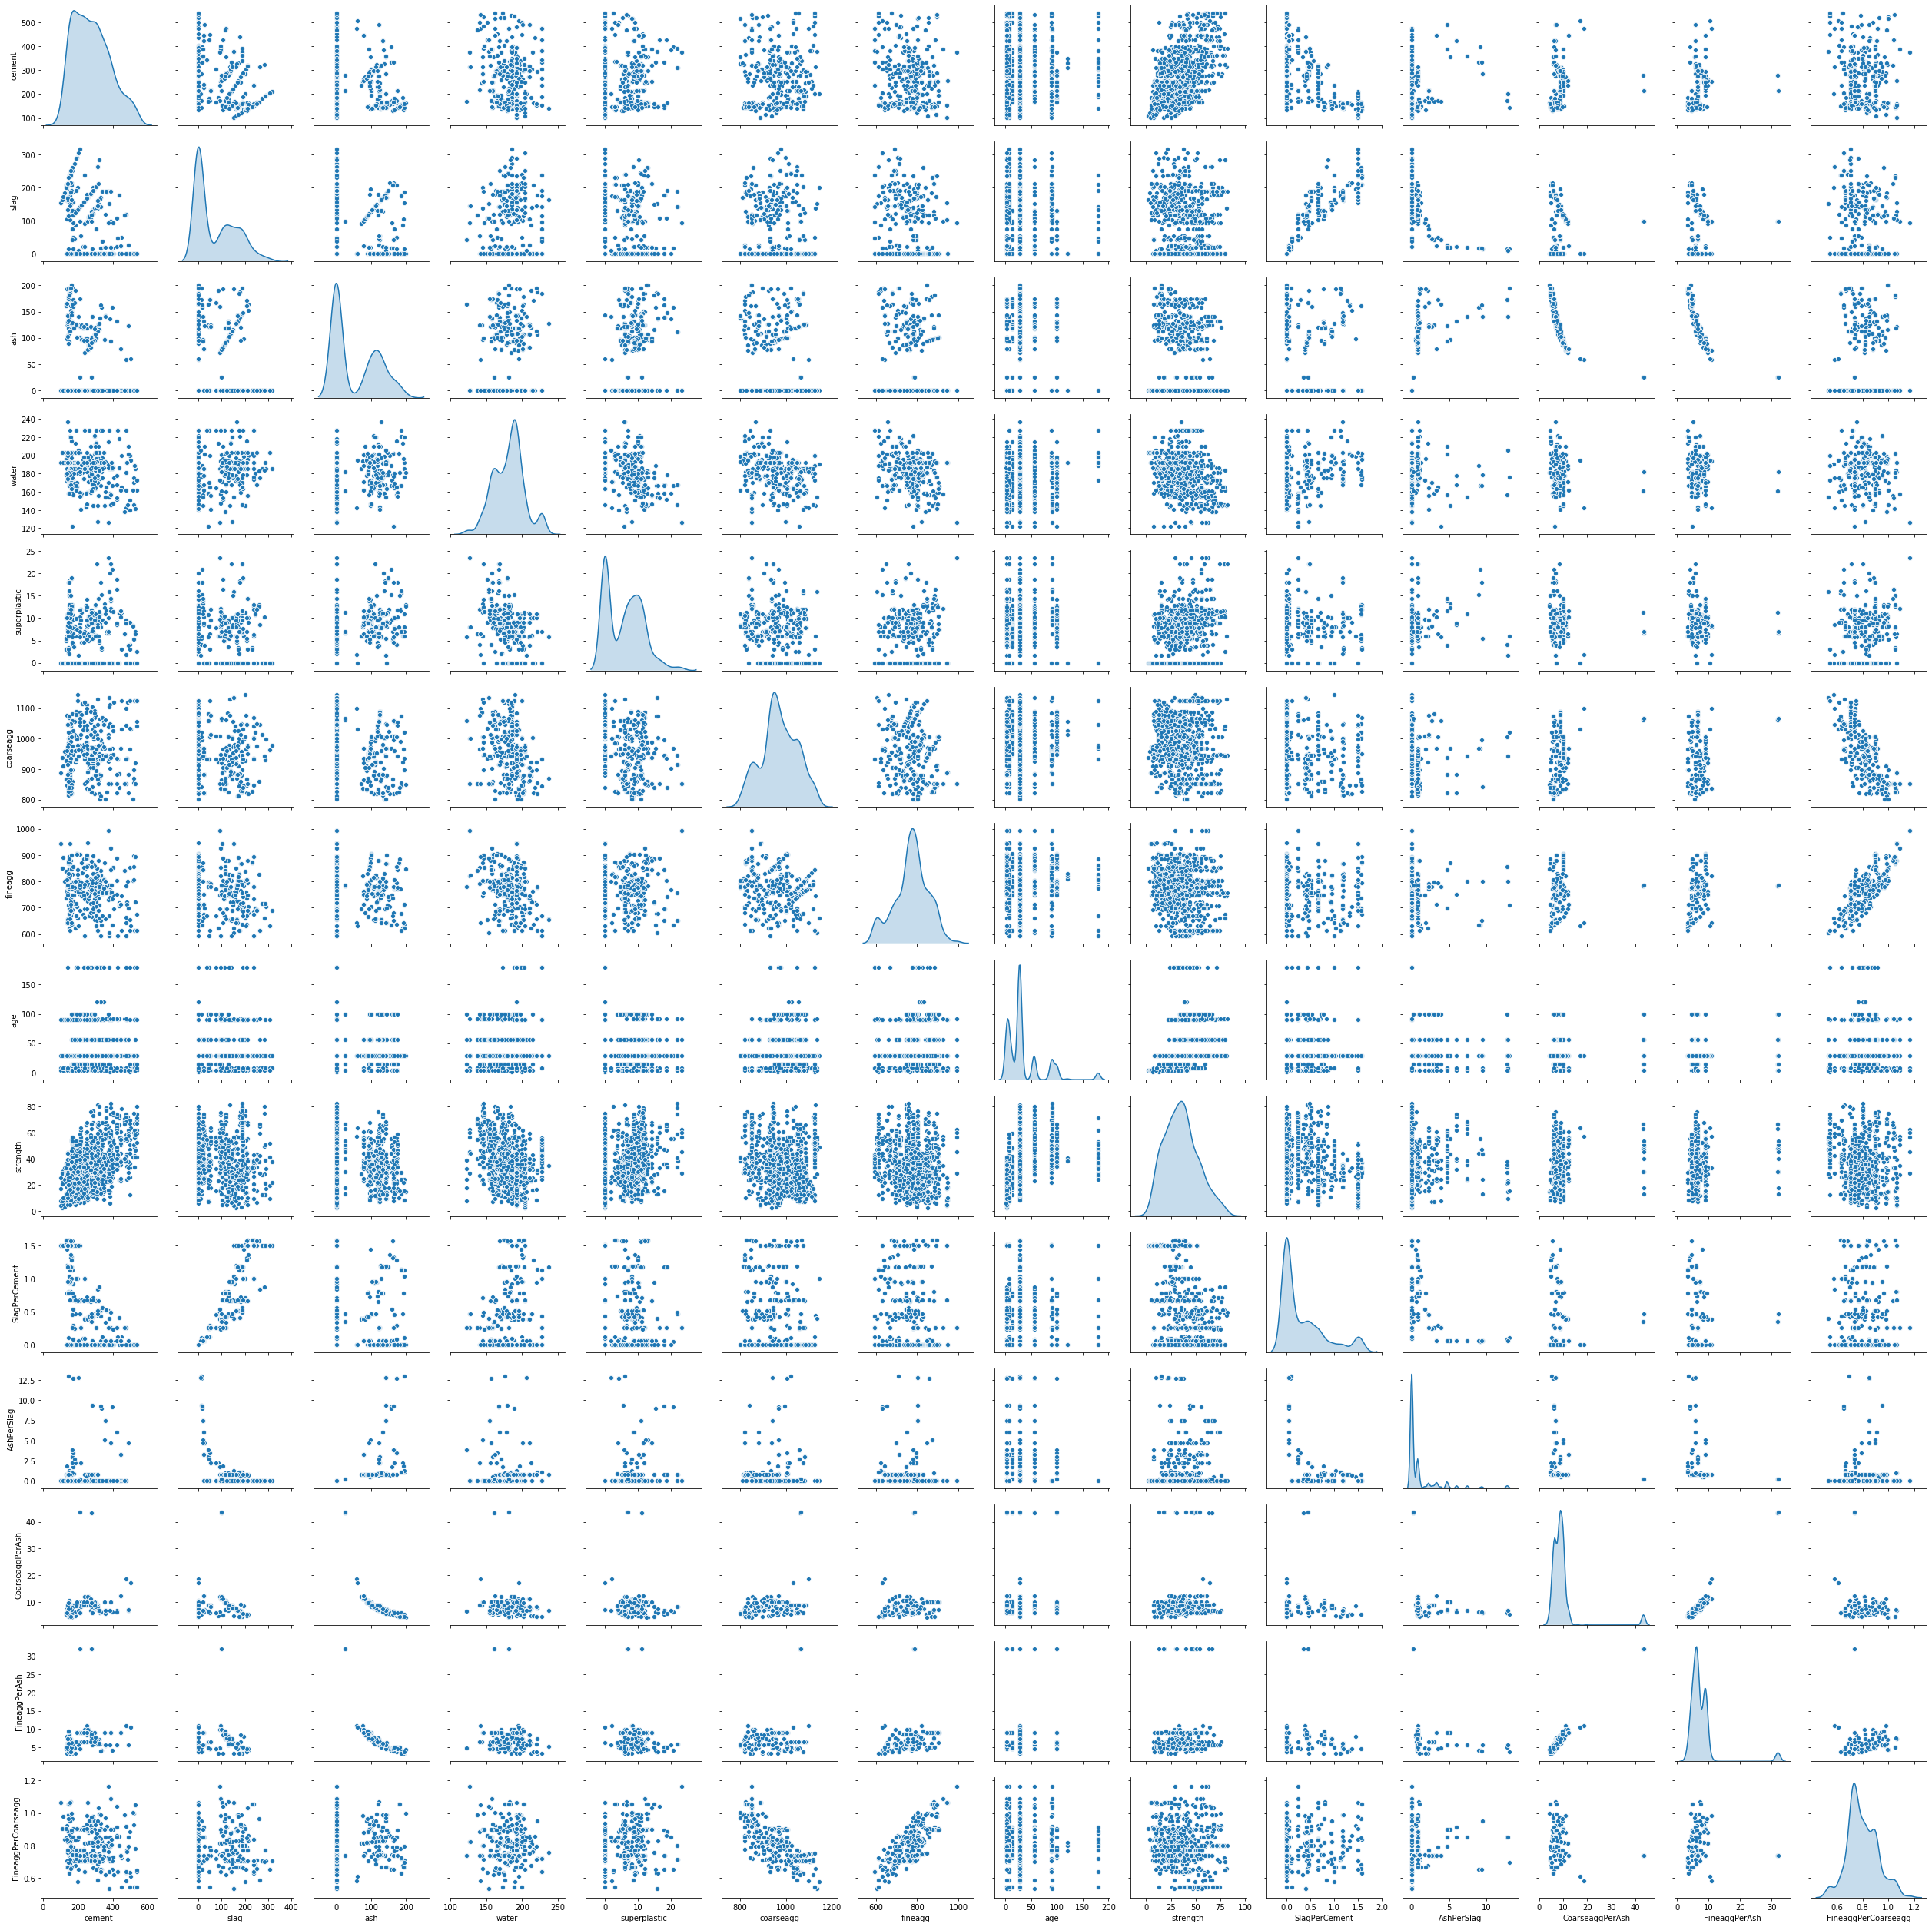

In [45]:
sns.pairplot(conDataComposite, diag_kind='kde')

#### Analysis
We find from the pair plot that the new composite variables do not seem to have anysignificant impact on out target variable.

Hence, we will not be adding any more features to the dataset.

## b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

In [46]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.6923461049846912
The coefficient for slag is 0.4224629351357246
The coefficient for ash is 0.20049693787552636
The coefficient for water is -0.18170997280672524
The coefficient for superplastic is 0.1497165941394898
The coefficient for coarseagg is 0.025612275049652578
The coefficient for fineagg is 0.015699768638143846
The coefficient for age is 0.46700510888155916


In [47]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.00642896903498541


In [48]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6654796494834669
0.6542200050385425


#### Analysis
A simple linear model gives a score of .665 on the training set and .654 on the testing set.

Let us see if a plynomial model will do any better.

In [49]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [50]:
X_poly = poly.fit_transform(X_scaled)
Poly_X_train, Poly_X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
Poly_X_train.shape

(721, 37)

In [51]:
regression_model.fit(Poly_X_train, y_train)
print(regression_model.coef_[0])

[ 1.07057693e-16  1.37321876e+01  1.03985423e+01  5.26083282e+00
 -7.13478754e-01  3.16388919e+00  2.11628200e+00  2.62180491e+00
  9.74575997e+00  1.07236871e+00  1.31858968e+00 -3.23607925e+00
 -1.04174960e+00  9.89263090e-01  5.24304029e-01  3.42796831e+00
  1.62062520e+00 -5.98507203e-01  1.40254083e+00  1.41125110e+00
  2.43207335e+00  5.19824800e+00 -2.05984616e+00 -1.19722616e+00
  5.62480138e-01  1.79933506e+00  4.42582887e+00  1.97028620e+00
 -1.45376417e+00 -4.08184539e-01  3.37539407e-01  1.46026087e+00
  1.63878322e+00  3.03117365e-01  1.87506924e+00  1.74736230e+00
  2.50008600e+00]


In [52]:
print(regression_model.score(Poly_X_train, y_train))
print(regression_model.score(Poly_X_test, y_test))

0.7654132176592945
0.7271031366921592


#### Analysis
We do find a significant increase in the model score from .66 to .76 for training set and from .65 to .72 on the test set.

Yet, this is not a significant value. And hence, we will need to look at many other models that might give us the necessary perfrormance

## c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [53]:
cluster_range = range( 1, 10 )   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(conData)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.777660e+07
1,2,2.848168e+07
2,3,2.224436e+07
3,4,1.944630e+07
4,5,1.727456e+07
5,6,1.536813e+07
6,7,1.408947e+07
7,8,1.300167e+07
8,9,1.220584e+07


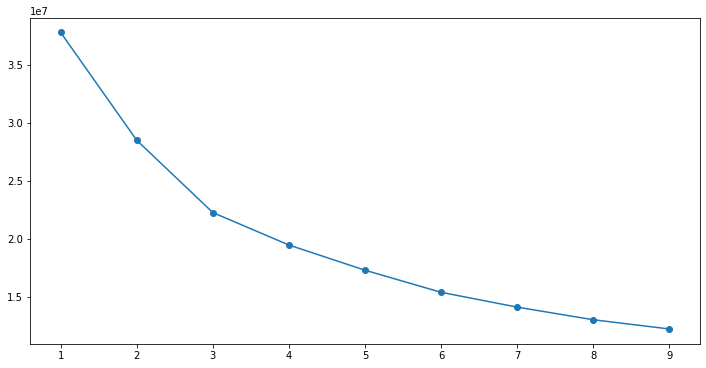

In [54]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Analysis
We see from the KMeans clustering elbow plot that the data has 3 significant clusters. Infact we can see this from the kde graph in the pair plot also. The graph shows 2-4 clusters in many of the variables.

## Deliverable - 3 (create the model )

## a. Obtain feature importance for the individual features and present your findings

In [55]:
X = conData.drop('strength',axis=1)
y = conData[['strength']]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)
X_train.shape

(721, 8)

In [57]:
X_test.shape

(309, 8)

In [58]:
y_train.shape

(721, 1)

In [59]:
y_test.shape

(309, 1)

#### Simple Overfit Decision Tree Regressor for finding feature importance

In [60]:
dt_model = DecisionTreeRegressor()

In [61]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [62]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.355101
slag          0.095958
ash           0.014669
water         0.124288
superplastic  0.018365
coarseagg     0.032089
fineagg       0.031620
age           0.327911


In [63]:
#dt_model.score(X_test, y_test)
print("Simple Overfit Decision Tree Regressor on training" , dt_model.score(X_train,y_train))
print("Simple Overfit Decision Tree Regressor on test data ",dt_model.score(X_test,y_test))

Simple Overfit Decision Tree Regressor on training 0.9923718620524061
Simple Overfit Decision Tree Regressor on test data  0.8547062040005253


In [64]:
drop_cols = ['ash' , 'coarseagg' , 'fineagg' , 'superplastic', 'strength']

X = conData.drop(labels= drop_cols , axis = 1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [66]:
dt_model_drop = DecisionTreeRegressor()

In [67]:
dt_model_drop.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [68]:
print (pd.DataFrame(dt_model_drop.feature_importances_, columns = ["Imp"], index = X_train.columns))

             Imp
cement  0.394125
slag    0.113726
water   0.164306
age     0.327842


In [69]:
#dt_model_drop.score(X_test, y_test)
print("Simple Overfit Decision Tree Regressor on training after column drop" , dt_model_drop.score(X_train,y_train))
print("Simple Overfit Decision Tree Regressor on test data after column drop",dt_model_drop.score(X_test,y_test))

Simple Overfit Decision Tree Regressor on training after column drop 0.9906960795313221
Simple Overfit Decision Tree Regressor on test data after column drop 0.8187142585067231


#### Analysis
Even after dropping the 4 independent variables (ash, coarseagg, fineagg, superplastic), the performance of the model has not changed much, confirming our earlier analysis that these variables do not affect the target variable much

Considering this, we will move forward with the dropepd column data for model building.

## Deliverable - 4 (Tuning the model)

## a. Algorithms that you think will be suitable for this project

#### Approach and model selection:
1) The below models will be used (After column drop)

    1. Simple Linear Regression
    2. K Nearest Neighbors - Regression
    3. Support Vector Machine - Regression 
    4. Gradient Boosting Regressor
    5. Bagging Regressor
    6. Random Forest Regression
    7. Decision Tree Regression
2) For each model, GridSearchCV will be performed to find out the best combination of hyper parameters to be used

3) For each model, K-fold will be used to validate the accuracy

4) Accuracy scores will be used as a performance measure

5) Results of every iteration will be tabulated for easy comparison

6) Final result will be concluded basis the comparison


## b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

#### 1. Simple Linear Regression (After column drop)

In [70]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LinearRegression())]) 
pipe_lr.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
print("Simple Linear Regression on training" , pipe_lr.score(X_train, y_train))
print("Simple Linear Regression on test data ",pipe_lr.score(X_test,y_test))

Test Accuracy: 0.598
Simple Linear Regression on training 0.6178286389194525
Simple Linear Regression on test data  0.5978330460630279


In [71]:
resultsDf = pd.DataFrame({'Method':['Simple Linear Regression'], 
                          'Accuracy (Train)': [pipe_lr.score(X_train, y_train)*100], 
                          'Accuracy (Test)': [pipe_lr.score(X_test,y_test)*100]})


In [72]:
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305


In [73]:
param_grid_LR = {
    'copy_X': [True,False],
    'fit_intercept': [True,False],
    'n_jobs': [2],
    'normalize': [True,False]
} 

In [74]:
LR = LinearRegression()

In [75]:
grid_search_LR = GridSearchCV(estimator = LR, param_grid = param_grid_LR, 
                          cv = 10, n_jobs = 1, verbose = 0, return_train_score=True)

In [76]:
grid_search_LR.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [2],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [77]:
grid_search_LR.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'normalize': False}

In [78]:
best_grid_LR = grid_search_LR.best_estimator_

In [79]:
print(best_grid_LR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=False)


In [80]:
pipe_lr_GCV = Pipeline([('scl', StandardScaler()), ('clf', LinearRegression(copy_X=True, fit_intercept=True, 
                                                                            n_jobs=2, normalize=False))]) 
pipe_lr_GCV.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr_GCV.score(X_test, y_test))
print("Simple Linear Regression on training" , pipe_lr_GCV.score(X_train, y_train))
print("Simple Linear Regression on test data ",pipe_lr_GCV.score(X_test,y_test))

Test Accuracy: 0.598
Simple Linear Regression on training 0.6178286389194525
Simple Linear Regression on test data  0.5978330460630279


In [81]:
tempResultsDf = pd.DataFrame({'Method':['Simple Linear Regression after GridSearchCV'], 
                              'Accuracy (Train)': [pipe_lr_GCV.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_lr_GCV.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305


In [82]:
# KFold Validation
kfold = KFold(n_splits=10, random_state=1)
scores = cross_val_score(pipe_lr_GCV, X_train, y_train, cv=kfold)
print("Accuracy" , scores.mean()*100.0)
print("Standard Deviation ", scores.std()*100.0)

Accuracy 60.426390665066585
Standard Deviation  5.427713356441342


In [83]:
resultsDfCOnf = pd.DataFrame({'Method':['Simple Linear Regression'], 
                              'Accuracy': [scores.mean()*100], 
                              'Standard Deviation': [scores.std()*100], 
                              'Lower Confidence Level': [scores.mean()*100-2*scores.std()*100], 
                              'Upper Confidence Level': [scores.mean()*100+2*scores.std()*100]})
resultsDfCOnf

,Method,Accuracy,Standard Deviation,Lower Confidence Level,Upper Confidence Level
0,Simple Linear Regression,60.426391,5.427713,49.570964,71.281817


#### 2. K Nearest Neighbors - Regression (After column drop)

In [84]:
pipe_KNN = Pipeline([('scl', StandardScaler()), ('clf', KNeighborsRegressor())]) 
pipe_KNN.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_KNN.score(X_test, y_test))
print("K Nearest Neighbors - Regression on training" , pipe_KNN.score(X_train, y_train))
print("K Nearest Neighbors - Regression on test data ",pipe_KNN.score(X_test,y_test))

Test Accuracy: 0.800
K Nearest Neighbors - Regression on training 0.8669436692024655
K Nearest Neighbors - Regression on test data  0.8001311260988982


In [85]:
tempResultsDf = pd.DataFrame({'Method':['K Nearest Neighbors - Regression'], 
                              'Accuracy (Train)': [pipe_KNN.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_KNN.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113


In [86]:
param_grid_KnnR = {
    'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
    'leaf_size': [5,10,30],
    'metric': ["minkowski"],
    'metric_params': [None],
    'n_jobs': [2],
    'n_neighbors': [3,5,6],
    'weights': ["uniform", "distance"]
} 

In [87]:
KnnR = KNeighborsRegressor()

In [88]:
grid_search_KnnR = GridSearchCV(estimator = KnnR, param_grid = param_grid_KnnR, 
                          cv = 10, n_jobs = 1, verbose = 0, return_train_score=True)

In [89]:
grid_search_KnnR.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 30], 'metric': ['minkowski'],
                         'metric_params': [None], 'n_jobs': [2],
                         'n_neighbors': [3, 5, 6],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [90]:
grid_search_KnnR.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 2,
 'n_neighbors': 6,
 'weights': 'distance'}

In [91]:
best_grid_KnnR = grid_search_KnnR.best_estimator_

In [92]:
print(best_grid_KnnR)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=2, n_neighbors=6, p=2,
                    weights='distance')


In [93]:
pipe_KNN_GCV = Pipeline([('scl', StandardScaler()), ('clf', KNeighborsRegressor(algorithm='ball_tree', 
                                                                                leaf_size=30, metric='minkowski',
                                                                                metric_params=None, n_jobs=2, 
                                                                                n_neighbors=6, p=2,weights='distance'))]) 
pipe_KNN_GCV.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_KNN_GCV.score(X_test, y_test))
print("K Nearest Neighbors - Regression on training" , pipe_KNN_GCV.score(X_train, y_train))
print("K Nearest Neighbors - Regression on test data ",pipe_KNN_GCV.score(X_test,y_test))

Test Accuracy: 0.830
K Nearest Neighbors - Regression on training 0.9906960795313221
K Nearest Neighbors - Regression on test data  0.8295327557348848


In [94]:
tempResultsDf = pd.DataFrame({'Method':['K Nearest Neighbors - Regression after GridSearchCV'], 
                              'Accuracy (Train)': [pipe_KNN_GCV.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_KNN_GCV.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276


In [95]:
# KFold Validation
kfold = KFold(n_splits=10, random_state=1)
scores = cross_val_score(pipe_KNN_GCV, X_train, y_train, cv=kfold)
print("Accuracy" , scores.mean()*100.0)
print("Standard Deviation ", scores.std()*100.0)

Accuracy 79.97316246667346
Standard Deviation  3.6504216273821473


In [96]:
tempResultsDfConf = pd.DataFrame({'Method':['K Nearest Neighbors - Regression'], 
                                  'Accuracy': [scores.mean()*100], 
                                  'Standard Deviation': [scores.std()*100], 
                                  'Lower Confidence Level': [scores.mean()*100-2*scores.std()*100], 
                                  'Upper Confidence Level': [scores.mean()*100+2*scores.std()*100]})
resultsDfCOnf = pd.concat([resultsDfCOnf, tempResultsDfConf])
resultsDfCOnf

,Method,Accuracy,Standard Deviation,Lower Confidence Level,Upper Confidence Level
0,Simple Linear Regression,60.426391,5.427713,49.570964,71.281817
0,K Nearest Neighbors - Regression,79.973162,3.650422,72.672319,87.274006


#### 3. Support Vector Machine - Regression (After column drop)

In [97]:
pipe_SVR = Pipeline([('scl', StandardScaler()), ('clf', SVR(gamma=0.025, C=3))]) 
pipe_SVR.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_SVR.score(X_test, y_test))
print("Support Vector Machine - Regression on training" , pipe_SVR.score(X_train, y_train))
print("Support Vector Machine - Regression on test data ",pipe_SVR.score(X_test,y_test))

Test Accuracy: 0.677
Support Vector Machine - Regression on training 0.6901747177914467
Support Vector Machine - Regression on test data  0.6773055508895982


In [98]:
tempResultsDf = pd.DataFrame({'Method':['Support Vector Machine - Regression'], 
                              'Accuracy (Train)': [pipe_SVR.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_SVR.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555


In [99]:
param_grid_SVR = {
    'C': [1,2,3],
    'gamma': [.01,.025,.03,.05]
} 

In [100]:
svr = SVR()

In [101]:
grid_search_svr = GridSearchCV(estimator = svr, param_grid = param_grid_SVR, 
                          cv = 10, n_jobs = 1, verbose = 0, return_train_score=True)

In [102]:
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=1,
             param_grid={'C': [1, 2, 3], 'gamma': [0.01, 0.025, 0.03, 0.05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [103]:
grid_search_svr.best_params_

{'C': 3, 'gamma': 0.01}

In [104]:
best_grid_svr = grid_search_svr.best_estimator_

In [105]:
print(best_grid_svr)

SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [106]:
pipe_SVR_GCV = Pipeline([('scl', StandardScaler()), ('clf', SVR(C=3, cache_size=200, coef0=0.0, 
                                                                degree=3, epsilon=0.1, gamma=0.01,
                                                                kernel='rbf', max_iter=-1, shrinking=True, 
                                                                tol=0.001, verbose=False))]) 
pipe_SVR_GCV.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_SVR_GCV.score(X_test, y_test))
print("Support Vector Machine - Regression on training" , pipe_SVR_GCV.score(X_train, y_train))
print("Support Vector Machine - Regression on test data ",pipe_SVR_GCV.score(X_test,y_test))

Test Accuracy: 0.590
Support Vector Machine - Regression on training 0.5999359457325975
Support Vector Machine - Regression on test data  0.5901234280862304


In [107]:
tempResultsDf = pd.DataFrame({'Method':['Support Vector Machine - Regression after GridSearchCV'], 
                              'Accuracy (Train)': [pipe_SVR_GCV.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_SVR_GCV.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555
0,Support Vector Machine - Regression after Grid...,59.993595,59.012343


In [108]:
# KFold Validation
kfold = KFold(n_splits=10, random_state=1)
scores = cross_val_score(pipe_SVR_GCV, X_train, y_train, cv=kfold)
print("Accuracy" , scores.mean()*100.0)
print("Standard Deviation ", scores.std()*100.0)

Accuracy 57.65925124929922
Standard Deviation  3.4689575622055977


In [109]:
tempResultsDfConf = pd.DataFrame({'Method':['Support Vector Machine - Regression'], 
                                  'Accuracy': [scores.mean()*100], 
                                  'Standard Deviation': [scores.std()*100], 
                                  'Lower Confidence Level': [scores.mean()*100-2*scores.std()*100], 
                                  'Upper Confidence Level': [scores.mean()*100+2*scores.std()*100]})
resultsDfCOnf = pd.concat([resultsDfCOnf, tempResultsDfConf])
resultsDfCOnf

,Method,Accuracy,Standard Deviation,Lower Confidence Level,Upper Confidence Level
0,Simple Linear Regression,60.426391,5.427713,49.570964,71.281817
0,K Nearest Neighbors - Regression,79.973162,3.650422,72.672319,87.274006
0,Support Vector Machine - Regression,57.659251,3.468958,50.721336,64.597166


#### 4. Gradient Boosting Regressor (After column drop)

In [110]:
pipe_GBR = Pipeline([('scl', StandardScaler()), ('clf', GradientBoostingRegressor(n_estimators=50))]) 
pipe_GBR.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_GBR.score(X_test, y_test))
print("Gradient Boosting Regression on training" , pipe_GBR.score(X_train, y_train))
print("Gradient Boosting Regression on test data ",pipe_GBR.score(X_test,y_test))

Test Accuracy: 0.847
Gradient Boosting Regression on training 0.9000838345632686
Gradient Boosting Regression on test data  0.846730902481809


In [111]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting Regressor'], 
                              'Accuracy (Train)': [pipe_GBR.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_GBR.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555
0,Support Vector Machine - Regression after Grid...,59.993595,59.012343
0,Gradient Boosting Regressor,90.008383,84.673090


In [112]:
param_grid_GBR = {
    'criterion': ["friedman_mse"],
    'max_depth': [3,5],
    'max_leaf_nodes': [3,5],
    'n_estimators': [10,50,100],
} 

In [113]:
gbr = GradientBoostingRegressor()

In [114]:
grid_search_gbr = GridSearchCV(estimator = gbr, param_grid = param_grid_GBR, 
                          cv = 10, n_jobs = 1, verbose = 0, return_train_score=True)

In [115]:
grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [116]:
grid_search_gbr.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_leaf_nodes': 5,
 'n_estimators': 100}

In [117]:
best_grid_gbr = grid_search_gbr.best_estimator_

In [118]:
print(best_grid_gbr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=5,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [119]:
pipe_GBR_GCV = Pipeline([('scl', StandardScaler()), ('clf', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=5,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False))]) 
pipe_GBR_GCV.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_GBR_GCV.score(X_test, y_test))
print("Gradient Boosting Regression on training" , pipe_GBR_GCV.score(X_train, y_train))
print("Gradient Boosting Regression on test data ",pipe_GBR_GCV.score(X_test,y_test))

Test Accuracy: 0.864
Gradient Boosting Regression on training 0.9135181981594145
Gradient Boosting Regression on test data  0.8637313970189691


In [120]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting Regressor after GridSearchCV'], 
                              'Accuracy (Train)': [pipe_GBR_GCV.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_GBR_GCV.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555
0,Support Vector Machine - Regression after Grid...,59.993595,59.012343
0,Gradient Boosting Regressor,90.008383,84.673090
0,Gradient Boosting Regressor after GridSearchCV,91.351820,86.373140


In [121]:
# KFold Validation
kfold = KFold(n_splits=10, random_state=1)
scores = cross_val_score(pipe_GBR_GCV, X_train, y_train, cv=kfold)
print("Accuracy" , scores.mean()*100.0)
print("Standard Deviation ", scores.std()*100.0)

Accuracy 86.55599731814505
Standard Deviation  2.2545367426541474


In [122]:
tempResultsDfConf = pd.DataFrame({'Method':['Gradient Boosting Regressor'], 
                                  'Accuracy': [scores.mean()*100], 
                                  'Standard Deviation': [scores.std()*100], 
                                  'Lower Confidence Level': [scores.mean()*100-2*scores.std()*100], 
                                  'Upper Confidence Level': [scores.mean()*100+2*scores.std()*100]})
resultsDfCOnf = pd.concat([resultsDfCOnf, tempResultsDfConf])
resultsDfCOnf

,Method,Accuracy,Standard Deviation,Lower Confidence Level,Upper Confidence Level
0,Simple Linear Regression,60.426391,5.427713,49.570964,71.281817
0,K Nearest Neighbors - Regression,79.973162,3.650422,72.672319,87.274006
0,Support Vector Machine - Regression,57.659251,3.468958,50.721336,64.597166
0,Gradient Boosting Regressor,86.555997,2.254537,82.046924,91.065071


#### 5. Bagging Regressor (After column drop)

In [123]:
pipe_BGR = Pipeline([('scl', StandardScaler()), ('clf', BaggingRegressor(n_estimators=50, oob_score= True))]) 
pipe_BGR.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_BGR.score(X_test, y_test))
print("Gradient Boosting Regression on training" , pipe_BGR.score(X_train, y_train))
print("Gradient Boosting Regression on test data ",pipe_BGR.score(X_test,y_test))

Test Accuracy: 0.897
Gradient Boosting Regression on training 0.9755323968569911
Gradient Boosting Regression on test data  0.896511892770001


In [124]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 
                              'Accuracy (Train)': [pipe_BGR.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_BGR.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555
0,Support Vector Machine - Regression after Grid...,59.993595,59.012343
0,Gradient Boosting Regressor,90.008383,84.673090
0,Gradient Boosting Regressor after GridSearchCV,91.351820,86.373140
0,Bagging Regressor,97.553240,89.651189


In [125]:
param_grid_BGR = {
    'bootstrap': [True],
    'oob_score': [True, False],
    'n_estimators': [10,50,100],
} 

In [126]:
bgr = BaggingRegressor()

In [127]:
grid_search_bgr = GridSearchCV(estimator = bgr, param_grid = param_grid_BGR, 
                          cv = 10, n_jobs = 1, verbose = 0, return_train_score=True)

In [128]:
grid_search_bgr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'bootstrap': [True], 'n_estimators': [10, 50, 100],
                         'oob_score': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [129]:
grid_search_bgr.best_params_

{'bootstrap': True, 'n_estimators': 100, 'oob_score': True}

In [130]:
best_grid_bgr = grid_search_bgr.best_estimator_

In [131]:
print(best_grid_bgr)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=True, random_state=None, verbose=0,
                 warm_start=False)


In [132]:
pipe_BGR_GCV = Pipeline([('scl', StandardScaler()), ('clf', BaggingRegressor(base_estimator=None, bootstrap=True, 
                                                                             bootstrap_features=False,
                                                                             max_features=1.0, max_samples=1.0, 
                                                                             n_estimators=100,n_jobs=None, oob_score=True, 
                                                                             random_state=None, verbose=0,warm_start=False))]) 
pipe_BGR_GCV.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_BGR_GCV.score(X_test, y_test))
print("Gradient Boosting Regression on training" , pipe_BGR_GCV.score(X_train, y_train))
print("Gradient Boosting Regression on test data ",pipe_BGR_GCV.score(X_test,y_test))

Test Accuracy: 0.892
Gradient Boosting Regression on training 0.9750542094386535
Gradient Boosting Regression on test data  0.892424366905438


In [133]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor after GridSearchCV'], 
                              'Accuracy (Train)': [pipe_BGR_GCV.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_BGR_GCV.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555
0,Support Vector Machine - Regression after Grid...,59.993595,59.012343
0,Gradient Boosting Regressor,90.008383,84.673090
0,Gradient Boosting Regressor after GridSearchCV,91.351820,86.373140
0,Bagging Regressor,97.553240,89.651189
0,Bagging Regressor after GridSearchCV,97.505421,89.242437


In [134]:
# KFold Validation
kfold = KFold(n_splits=10, random_state=1)
scores = cross_val_score(pipe_BGR_GCV, X_train, y_train, cv=kfold)
print("Accuracy" , scores.mean()*100.0)
print("Standard Deviation ", scores.std()*100.0)

Accuracy 86.93867775424184
Standard Deviation  2.27899487943939


In [135]:
tempResultsDfConf = pd.DataFrame({'Method':['Bagging Regressor'], 
                                  'Accuracy': [scores.mean()*100], 
                                  'Standard Deviation': [scores.std()*100], 
                                  'Lower Confidence Level': [scores.mean()*100-2*scores.std()*100], 
                                  'Upper Confidence Level': [scores.mean()*100+2*scores.std()*100]})
resultsDfCOnf = pd.concat([resultsDfCOnf, tempResultsDfConf])
resultsDfCOnf

,Method,Accuracy,Standard Deviation,Lower Confidence Level,Upper Confidence Level
0,Simple Linear Regression,60.426391,5.427713,49.570964,71.281817
0,K Nearest Neighbors - Regression,79.973162,3.650422,72.672319,87.274006
0,Support Vector Machine - Regression,57.659251,3.468958,50.721336,64.597166
0,Gradient Boosting Regressor,86.555997,2.254537,82.046924,91.065071
0,Bagging Regressor,86.938678,2.278995,82.380688,91.496668


#### 6. Random Forest Regression (After column drop)

In [136]:
pipe_lr_RF = Pipeline([('scl', StandardScaler()), ('clf', RandomForestRegressor(n_estimators=50))]) 
pipe_lr_RF.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr_RF.score(X_test, y_test))
print("Random Forest Regression on training" , pipe_lr_RF.score(X_train, y_train))
print("Random Forest Regression on test data ",pipe_lr_RF.score(X_test,y_test))

Test Accuracy: 0.899
Random Forest Regression on training 0.9765572475652803
Random Forest Regression on test data  0.898841569987637


In [137]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regression'], 
                              'Accuracy (Train)': [pipe_lr_RF.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_lr_RF.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555
0,Support Vector Machine - Regression after Grid...,59.993595,59.012343
0,Gradient Boosting Regressor,90.008383,84.673090
0,Gradient Boosting Regressor after GridSearchCV,91.351820,86.373140
0,Bagging Regressor,97.553240,89.651189
0,Bagging Regressor after GridSearchCV,97.505421,89.242437


In [138]:
param_grid_RF = {
    'bootstrap': [True,False],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,8,10]
}  

In [139]:
rf = RandomForestRegressor()

In [140]:
grid_search_RF = GridSearchCV(estimator = rf, param_grid = param_grid_RF, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [141]:
grid_search_RF.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'bootstrap': [True, False], 'max_d

In [142]:
grid_search_RF.best_params_

{'bootstrap': False,
 'max_depth': 6,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 10}

In [143]:
best_grid = grid_search_RF.best_estimator_

In [144]:
print(best_grid)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=6,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [145]:
pipe_lr_RF_GCV = Pipeline([('scl', StandardScaler()), ('clf', RandomForestRegressor(bootstrap=False, criterion='mse', 
                      max_depth=6,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False))]) 
pipe_lr_RF_GCV.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_lr_RF_GCV.score(X_test, y_test))
print("Random Forest Regression on training AFTER GridSearchCV " , pipe_lr_RF_GCV.score(X_train, y_train))
print("Random Forest Regression on test data AFTER GridSearchCV ",pipe_lr_RF_GCV.score(X_test,y_test))

Test Accuracy: 0.818
Random Forest Regression on training AFTER GridSearchCV  0.8896147948983183
Random Forest Regression on test data AFTER GridSearchCV  0.8177359130215505


In [146]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regression after GridSearchCV'], 
                              'Accuracy (Train)': [pipe_lr_RF_GCV.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_lr_RF_GCV.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555
0,Support Vector Machine - Regression after Grid...,59.993595,59.012343
0,Gradient Boosting Regressor,90.008383,84.673090
0,Gradient Boosting Regressor after GridSearchCV,91.351820,86.373140
0,Bagging Regressor,97.553240,89.651189
0,Bagging Regressor after GridSearchCV,97.505421,89.242437


In [147]:
# KFold Validation
kfold = KFold(n_splits=10, random_state=1)
scores = cross_val_score(pipe_lr_RF_GCV, X_train, y_train, cv=kfold)
print("Accuracy" , scores.mean()*100.0)
print("Standard Deviation ", scores.std()*100.0)

Accuracy 83.17613648211714
Standard Deviation  2.904062831979115


In [148]:
tempResultsDfConf = pd.DataFrame({'Method':['Random Forest Regression'], 
                                  'Accuracy': [scores.mean()*100], 
                                  'Standard Deviation': [scores.std()*100], 
                                  'Lower Confidence Level': [scores.mean()*100-2*scores.std()*100], 
                                  'Upper Confidence Level': [scores.mean()*100+2*scores.std()*100]})
resultsDfCOnf = pd.concat([resultsDfCOnf, tempResultsDfConf])
resultsDfCOnf

,Method,Accuracy,Standard Deviation,Lower Confidence Level,Upper Confidence Level
0,Simple Linear Regression,60.426391,5.427713,49.570964,71.281817
0,K Nearest Neighbors - Regression,79.973162,3.650422,72.672319,87.274006
0,Support Vector Machine - Regression,57.659251,3.468958,50.721336,64.597166
0,Gradient Boosting Regressor,86.555997,2.254537,82.046924,91.065071
0,Bagging Regressor,86.938678,2.278995,82.380688,91.496668
0,Random Forest Regression,83.176136,2.904063,77.368011,88.984262


#### 7. Decision Tree Regression (After column drop)

In [149]:
pipe_DTR = Pipeline([('scl', StandardScaler()), ('clf', DecisionTreeRegressor())]) 
pipe_DTR.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_DTR.score(X_test, y_test))
print("Decision Tree Regression on training" , pipe_DTR.score(X_train, y_train))
print("Decision Tree Regression on test data ",pipe_DTR.score(X_test,y_test))

Test Accuracy: 0.824
Decision Tree Regression on training 0.9906960795313221
Decision Tree Regression on test data  0.8236468993247616


In [150]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree Regression'], 
                              'Accuracy (Train)': [pipe_DTR.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_DTR.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555
0,Support Vector Machine - Regression after Grid...,59.993595,59.012343
0,Gradient Boosting Regressor,90.008383,84.673090
0,Gradient Boosting Regressor after GridSearchCV,91.351820,86.373140
0,Bagging Regressor,97.553240,89.651189
0,Bagging Regressor after GridSearchCV,97.505421,89.242437


In [151]:
param_grid_DTR = {
    'criterion': ["mse", "friedman_mse"],
    'max_depth': [3,5,8],
    'max_features': [2, 3],
    'max_leaf_nodes': [3, 4],
    'min_samples_split': [2,5,10],
    'splitter': ["best", "random"]
}

In [152]:
dtr = DecisionTreeRegressor()

In [153]:
grid_search_DTR = GridSearchCV(estimator = dtr, param_grid = param_grid_DTR, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [154]:
grid_search_DTR.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=1,
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [3, 5, 8], 'max_features': [2, 3],
                         'max_leaf_nodes': [3, 4],
                         'mi

In [155]:
grid_search_DTR.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 3,
 'max_leaf_nodes': 4,
 'min_samples_split': 5,
 'splitter': 'best'}

In [156]:
best_grid_DTR = grid_search_DTR.best_estimator_

In [157]:
print(best_grid_DTR)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=3,
                      max_leaf_nodes=4, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [158]:
pipe_DTR_GCV = Pipeline([('scl', StandardScaler()), ('clf', DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, 
                      max_features=3,
                      max_leaf_nodes=4, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'))]) 
pipe_DTR_GCV.fit(X_train, y_train) 
print('Test Accuracy: %.3f' % pipe_DTR_GCV.score(X_test, y_test))
print("Decision Tree Regression on training" , pipe_DTR_GCV.score(X_train, y_train))
print("Decision Tree Regression on test data ",pipe_DTR_GCV.score(X_test,y_test))

Test Accuracy: 0.435
Decision Tree Regression on training 0.4890274254924395
Decision Tree Regression on test data  0.4354695958902519


In [159]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree Regression after GridSearchCV'], 
                              'Accuracy (Train)': [pipe_DTR_GCV.score(X_train, y_train)*100], 
                              'Accuracy (Test)': [pipe_DTR_GCV.score(X_test,y_test)*100]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy (Train),Accuracy (Test)
0,Simple Linear Regression,61.782864,59.783305
0,Simple Linear Regression after GridSearchCV,61.782864,59.783305
0,K Nearest Neighbors - Regression,86.694367,80.013113
0,K Nearest Neighbors - Regression after GridSea...,99.069608,82.953276
0,Support Vector Machine - Regression,69.017472,67.730555
0,Support Vector Machine - Regression after Grid...,59.993595,59.012343
0,Gradient Boosting Regressor,90.008383,84.673090
0,Gradient Boosting Regressor after GridSearchCV,91.351820,86.373140
0,Bagging Regressor,97.553240,89.651189
0,Bagging Regressor after GridSearchCV,97.505421,89.242437


In [160]:
# KFold Validation
kfold = KFold(n_splits=10, random_state=1)
scores = cross_val_score(pipe_DTR_GCV, X_train, y_train, cv=kfold)
print("Accuracy" , scores.mean()*100.0)
print("Standard Deviation ", scores.std()*100.0)

Accuracy 44.77168364648424
Standard Deviation  6.909712508198727


In [161]:
tempResultsDfConf = pd.DataFrame({'Method':['Decision Tree Regression'], 
                                  'Accuracy': [scores.mean()*100], 
                                  'Standard Deviation': [scores.std()*100], 
                                  'Lower Confidence Level': [scores.mean()*100-2*scores.std()*100], 
                                  'Upper Confidence Level': [scores.mean()*100+2*scores.std()*100]})
resultsDfCOnf = pd.concat([resultsDfCOnf, tempResultsDfConf])
resultsDfCOnf

,Method,Accuracy,Standard Deviation,Lower Confidence Level,Upper Confidence Level
0,Simple Linear Regression,60.426391,5.427713,49.570964,71.281817
0,K Nearest Neighbors - Regression,79.973162,3.650422,72.672319,87.274006
0,Support Vector Machine - Regression,57.659251,3.468958,50.721336,64.597166
0,Gradient Boosting Regressor,86.555997,2.254537,82.046924,91.065071
0,Bagging Regressor,86.938678,2.278995,82.380688,91.496668
0,Random Forest Regression,83.176136,2.904063,77.368011,88.984262
0,Decision Tree Regression,44.771684,6.909713,30.952259,58.591109


## c. Model performance range at 95% confidence level

#### Analysis
From the Above table we can see that the best performance is achived by Bagging Regressor with a confidence range from the KFold Cross Validation of 82.38 to 91.5. 

This is followed very closely by Gradient Boost Regressor with a range on 82.04 to 91.06

Moreover, Bagging Regressor performed better in the Grid Search CV. 

So we will select Bagging Regressor as our best model and do the 95% confidence level on it. 

In [162]:
concrete_XY = X.join(y)

In [163]:
concrete_XY = concrete_XY.apply(zscore)

In [164]:
values = concrete_XY.values

n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(conData) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
    bgr_conf = BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=50,
                 n_jobs=None, oob_score=True, random_state=None, verbose=0,
                 warm_start=False)
    bgr_conf.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
    predictions = bgr_conf.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = bgr_conf.score(test[:, :-1] , y_test)

    stats.append(score)


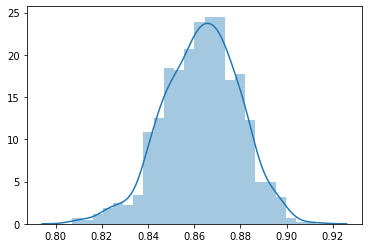

95.0 confidence interval 82.8% and 89.3%


In [165]:
# plot scores

sns.distplot(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))